In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [4]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [5]:
def initialize_centroids(X, k):
    np.random.seed(42)
    random_idx = np.random.permutation(X.shape[0])[:k]
    return X[random_idx]

In [6]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, c) for c in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

In [7]:
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points = X[clusters == i]
        if len(points) > 0:
            new_centroids.append(points.mean(axis=0))
        else:
            # Reinitialize empty cluster randomly
            new_centroids.append(X[np.random.choice(range(X.shape[0]))])
    return np.vstack(new_centroids)

In [8]:

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [9]:
def plot_clusters(X, clusters, centroids, title):
    plt.figure(figsize=(6, 4))
    for i in range(len(np.unique(clusters))):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.legend()
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [10]:
def evaluate_clusters(X, clusters):
    metrics = {}
    if len(set(clusters)) > 1:
        metrics['Silhouette Score'] = silhouette_score(X, clusters)
        metrics['Davies–Bouldin Index'] = davies_bouldin_score(X, clusters)
        metrics['Calinski–Harabasz Index'] = calinski_harabasz_score(X, clusters)
    else:
        metrics['Silhouette Score'] = np.nan
        metrics['Davies–Bouldin Index'] = np.nan
        metrics['Calinski–Harabasz Index'] = np.nan
    metrics['WCSS (Inertia)'] = sum([np.sum((X[clusters == i] - X[clusters == i].mean(axis=0))**2) for i in np.unique(clusters)])
    return metrics

# ON GIVEN DATASET

In [12]:
vehicle_df = pd.read_csv('/content/drive/MyDrive/My_ML_Labs/Lab_08/lab_vehicle.csv')
vehicle_df.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [13]:
numeric_df = vehicle_df.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
X_vehicle = scaler.fit_transform(numeric_df)

In [16]:
k = 3
centroids_v, clusters_v = kmeans(X_vehicle, k)

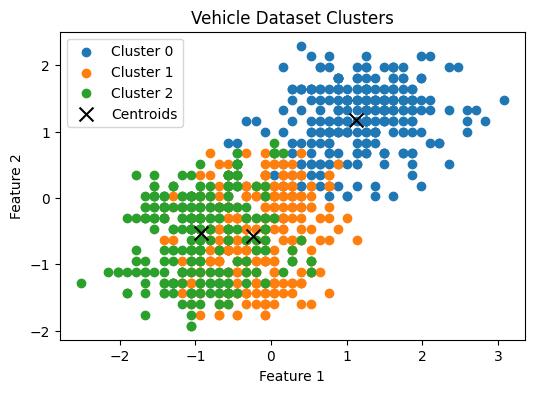

In [17]:
plot_clusters(X_vehicle, clusters_v, centroids_v, 'Vehicle Dataset Clusters')

In [18]:
vehicle_metrics = evaluate_clusters(X_vehicle, clusters_v)
print("Vehicle Dataset Cluster Evaluation Metrics:")
for k, v in vehicle_metrics.items():
    print(f"{k}: {v:.4f}")

Vehicle Dataset Cluster Evaluation Metrics:
Silhouette Score: 0.2919
Davies–Bouldin Index: 1.3090
Calinski–Harabasz Index: 456.7878
WCSS (Inertia): 7308.0851


# ON MY DATASET

In [19]:
iris = load_iris()
X_iris = scaler.fit_transform(iris.data)

In [20]:
k = 5
centroids_i, clusters_i = kmeans(X_iris, k)

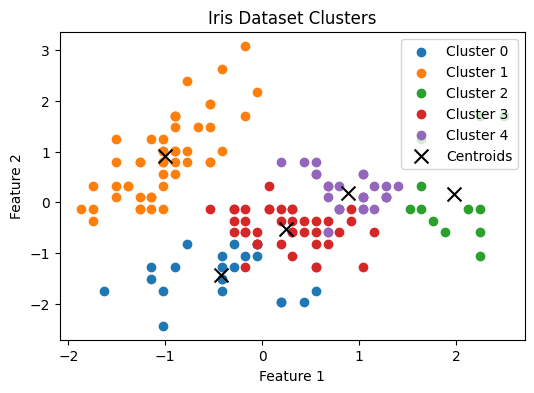

In [21]:
plot_clusters(X_iris[:, :2], clusters_i, centroids_i[:, :2], 'Iris Dataset Clusters')

In [22]:
iris_metrics = evaluate_clusters(X_iris, clusters_i)
print("\nIris Dataset Cluster Evaluation Metrics:")
for k, v in iris_metrics.items():
    print(f"{k}: {v:.4f}")


Iris Dataset Cluster Evaluation Metrics:
Silhouette Score: 0.3928
Davies–Bouldin Index: 1.0595
Calinski–Harabasz Index: 173.6595
WCSS (Inertia): 103.6161
